In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

In [2]:
train_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
test_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv")

In [6]:
# view training data examples
train_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [5]:
# view test data examples
test_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [7]:
scale_factor = 1000.0

# Scale the training set's label.
train_df["median_house_value"] /= scale_factor 

# Scale the test set's label
test_df["median_house_value"] /= scale_factor

In [8]:
# Shuffle the data in the training set
shuffled_train_df = train_df.reindex(np.random.permutation(train_df.index))

In [10]:
# define method to build model
def build_model(my_learning_rate):
  model = tf.keras.models.Sequential()

  # Add one linear layer to the model to yield a simple linear regressor.
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

  # Configure training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.experimental.RMSprop(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model

print("Defined the build_model function.")

In [11]:
# method to train model
def train_model(model, df, feature, label, my_epochs, 
                my_batch_size=None, my_validation_split=0.1):
  """Feed a dataset into the model in order to train it."""

  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=my_batch_size,
                      epochs=my_epochs,
                      validation_split=my_validation_split)

  # The list of epochs is stored separately from the 
  # rest of history.
  epochs = history.epoch
  
  # Isolate the root mean squared error for each epoch.
  hist = pd.DataFrame(history.history)
  rmse = hist["root_mean_squared_error"]

  return epochs, rmse, history.history

print("Defined the train_model function.")

Defined the train_model function.


In [13]:
# method to plot the loss curves
def plot_the_loss_curve(epochs, rmse_training, rmse_validation):

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs[1:], rmse_training[1:], label="Training Loss")
  plt.plot(epochs[1:], rmse_validation[1:], label="Validation Loss")
  plt.legend()
  
  # We're not going to plot the first epoch, since the loss on the first epoch
  # is often substantially greater than the loss for other epochs.
  merged_rmse_lists = rmse_training[1:] + rmse_validation[1:]
  highest_loss = max(merged_rmse_lists)
  lowest_loss = min(merged_rmse_lists)
  delta = highest_loss - lowest_loss
  print(delta)

  #set limit of y-axis
  top_of_y_axis = highest_loss + (delta * 0.05)
  bottom_of_y_axis = lowest_loss - (delta * 0.05)
   
  plt.ylim([bottom_of_y_axis, top_of_y_axis])
  plt.show()  

print("Defined the plot_the_loss_curve function.")

Defined the plot_the_loss_curve function.


Epoch 1/10
136/136 [==============================] - 0s 858us/step - loss: 44284.2266 - root_mean_squared_error: 210.4382 - val_loss: 33438.5508 - val_root_mean_squared_error: 182.8621
Epoch 2/10
136/136 [==============================] - 0s 511us/step - loss: 25933.1641 - root_mean_squared_error: 161.0378 - val_loss: 18445.8418 - val_root_mean_squared_error: 135.8155
Epoch 3/10
136/136 [==============================] - 0s 504us/step - loss: 14002.9805 - root_mean_squared_error: 118.3342 - val_loss: 9680.3389 - val_root_mean_squared_error: 98.3887
Epoch 4/10
136/136 [==============================] - 0s 509us/step - loss: 8149.8369 - root_mean_squared_error: 90.2765 - val_loss: 6766.8818 - val_root_mean_squared_error: 82.2611
Epoch 5/10
136/136 [==============================] - 0s 526us/step - loss: 7094.7705 - root_mean_squared_error: 84.2305 - val_loss: 6716.6899 - val_root_mean_squared_error: 81.9554
Epoch 6/10
136/136 [==============================] - 0s 512us/step - loss: 7088

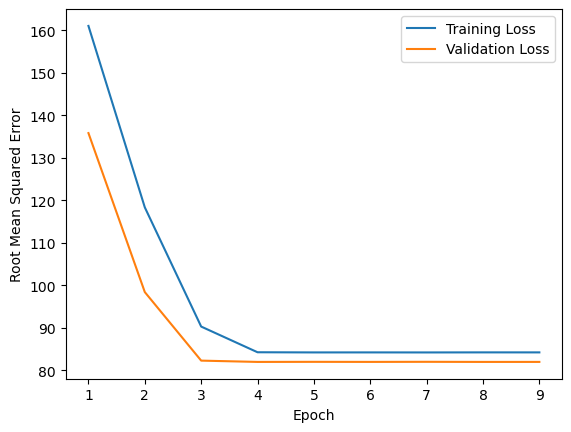

In [18]:
# hyperparameters.
learning_rate = 0.08
epochs = 10
batch_size = 100

# Split the original training set into a reduced training set and a
# validation set. 
validation_split = 0.2

# Identify the feature and the label.
my_feature = "median_income"    # the median income on a specific city block.
my_label = "median_house_value" # the median house value on a specific city block.

# shuffle training data
train_df = train_df.reindex(np.random.permutation(train_df.index))

# build and train the model.
my_model = build_model(learning_rate)
epochs, rmse, history = train_model(my_model, train_df, my_feature, 
                                    my_label, epochs, batch_size, 
                                    validation_split)

plot_the_loss_curve(epochs, history["root_mean_squared_error"], 
                    history["val_root_mean_squared_error"])

In [20]:
#evaluate model performence on unseen test data
x_test = test_df[my_feature]
y_test = test_df[my_label]

results = my_model.evaluate(x_test, y_test, batch_size=batch_size)

30/30 [==============================] - 0s 534us/step - loss: 7010.1113 - root_mean_squared_error: 83.7264
